# AI Fusion: An Epic Journey in Problem-Solving

## Case Study Introduction

This case study focuses on one of the leading Indian private sector banks' endeavors to enhance personal loan campaigns through Data Exploration and Predictive Modeling.

<img src = "bank.jpg">

## Market Context

In the dynamic landscape of the Indian banking sector, competition is fierce, and customer preferences constantly evolve. The personal loan market in India is a $20+ billion industry with interest rates ranging from 10% to 20%. This market primarily attracts younger working professionals who often apply online, while lenders face competition, credit scoring challenges, and regulatory oversight.

With a network of 500+ branches, our client operates in a highly competitive market where customer acquisition, retention, and cross-selling are critical for sustained growth. India’s diverse economic and cultural landscape necessitates a flexible and data-driven marketing approach. Understanding and catering to the specific financial needs of a large and diverse customer base is essential for our client's continued success.

With a majority of customers being depositors, the bank’s market presence is solidified as a trusted repository for savings. Yet, the bank faces a challenge in diversifying its services and engaging these depositors in lucrative products like personal loans, which require a different marketing strategy. The bank's market context includes a quest for innovative marketing techniques to target potential customers effectively.

## Bank Background

Our client, a leading Indian bank, is a prominent player in India's financial sector. With a reputation for safety and reliability, the bank has established a significant foothold in the Indian banking industry.

- **Branches:** Operates with a strong presence, boasting over 300 branches nationwide.
- **Customer Base:** The bank's customer base surpasses 11.5 million individuals, primarily characterized as depositors.
- **Services:** The bank’s proficiency in accumulating and preserving deposits serves as a financial custodian to millions.

The bank sees this as an opportunity to capitalize on the trust and diversify its portfolio by offering personal loans to depositors. The bank's rich history, extensive reach, and solid foundation provide a solid backdrop for leveraging data-driven marketing strategies to explore new avenues and enhance customer engagement.

## Business Challenge

<img src = "loan.jpg">

The primary challenge faced by our client is to identify potential customers within its vast customer base who are likely to accept personal loan offers. This challenge involves understanding the factors that influence a customer's decision to take a personal loan and developing a data-driven strategy to target these potential customers effectively. The bank aims to increase the success rate of its marketing campaigns by refining its approach.

# Target:

<ol>
<li>To get the best performing model
<li>EDA
<li>Target Potential Customers
</ol>

## Starting the Project!

## Importing required libraries

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, StackingClassifier 
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [104]:
#Loading the Dataset
bank_data = pd.read_csv('loan_dataset.csv')

## Exploratory Data Analysis

#### Understanding the dataset and its values

In [105]:
bank_data.head(2)

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no


It seems that the dataset had one serial number column, without any column name, at the starting position.<br>
It is unnecessary to us and will be removed.

In [106]:
#Removing the first column
df = bank_data.drop(columns='Unnamed: 0')

#### From the first five rows of the loan dataset, we can understand that there are 11 columns and in these 11 columns<br>

There are 5 continuous columns.<br>
-> ID<br>
-> Pin-code<br>
-> age<br>
-> Fam members<br>
-> T.Experience<br>
-> Income<br><br>
<br>There are 5 binary classification columns, namely<br>
-> Mortgage<br>
-> Fixed Deposit<br>
-> Demat<br>
-> Net Banking<br>
-> Loan<br>
<br>
Finally, there is one categorical column of Education

#### Now lets perform deeper checking of the data and even Data Cleaning if required

Checking for missing values

In [107]:
print(df.isnull().sum())

ID               0
Pin-code         0
age              0
Fam members      0
Education        0
T.Experience     0
Income           0
Mortgage         0
Fixed Deposit    0
Demat            0
Net Banking      0
Loan             0
dtype: int64


From this, we can see that, there is no missing data.

Now we will check for negative values since our dataset should not have any.

In [108]:
df.describe()

,ID,Pin-code,age,Fam members,T.Experience,Income,Mortgage
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,8.186318e+06,110006.557800,43.338400,2.396400,20.104600,5.901936e+05,4.519904e+05
std,3.638026e+06,4.998725,11.463166,1.147663,11.467954,3.682698e+05,8.137104e+05
min,1.000100e+04,110001.000000,21.000000,1.000000,-3.000000,6.400000e+04,0.000000e+00
25%,1.000125e+07,110003.000000,33.000000,1.000000,10.000000,3.120000e+05,0.000000e+00
50%,1.000250e+07,110004.000000,43.000000,2.000000,20.000000,5.120000e+05,0.000000e+00
75%,1.000375e+07,110011.000000,53.000000,3.000000,30.000000,7.840000e+05,8.080000e+05
max,1.000500e+07,110014.000000,65.000000,4.000000,43.000000,1.792000e+06,5.080000e+06


One thing that caught my eye is the minimum value of T. Experience

In [109]:
df['T.Experience'].describe(include='all')

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: T.Experience, dtype: float64

According to the Data Description provided, T. Experience means Years of Professional Experience

This means the negative values are either a mistype or invalid data since negative experience is <b>IMPOSSIBLE</b>

Our next plan of action will be based on if the number of rows affected.

In [110]:
negative_count = (df['T.Experience'] < 0).sum()
print(f"Number of rows with negative T.Experience values: {negative_count}")

Number of rows with negative T.Experience values: 52


52 rows out of 5000 are affected by this error<br>
which is roughly<b> 1% rows</b> of the entire dataset<br>

Investigating these rows for potential reasons

In [111]:
negative_experience_rows = df[df['T.Experience'] < 0][['T.Experience', 'age', 'Income']]
print(negative_experience_rows)

      T.Experience  age   Income
89            -1.0   23   904000
226           -1.0   22   312000
315           -2.0   22   408000
451           -2.0   26   384000
524           -1.0   22   600000
536           -1.0   23   344000
540           -1.0   23   872000
576           -1.0   23   384000
583           -1.0   22   304000
597           -2.0   22  1000000
649           -1.0   23   656000
670           -1.0   21   488000
686           -1.0   22   304000
793           -2.0   22  1200000
889           -2.0   22   656000
909           -1.0   21  1192000
1173          -1.0   22   280000
1428          -1.0   23   168000
1522          -1.0   23   808000
1905          -1.0   23   896000
2102          -1.0   23   648000
2430          -1.0   21   584000
2466          -2.0   22   640000
2545          -1.0   23   312000
2618          -3.0   21   440000
2717          -2.0   21   360000
2848          -1.0   22   624000
2876          -2.0   22   640000
2962          -2.0   21   648000
2980      

Now, we might have a potential reason on why such errors took place.<br>
Notice, how the ages of all these negative values are the youngest customers of the bank.<br>
All the negative values range from -1 to -2 with a single -3 value.

This means, the negative values are either meant for no experience or some months of experience.

Either way, their size is small and so are their values.

We will replace the invalid values with <b>ZERO</b>

In [112]:
df['T.Experience'] = df['T.Experience'].apply(lambda x: 0 if x < 0 else x)

Confirming whether all the negative values have been handled

In [113]:
print(df['T.Experience'].describe())

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: T.Experience, dtype: float64


The invalid data has been handled

#### We will now start transforming our data into what the model can understand and learn from

##### The first hurdle we will tackle, are <u>the binary categorical columns<u>

In [114]:
bin_ca = df[['Fixed Deposit', 'Demat', 'Net Banking']]
bin_ca.head()

,Fixed Deposit,Demat,Net Banking
0,no,yes,no
1,no,yes,no
2,no,no,no
3,no,no,no
4,no,no,no


### Fixed Deposit, Demat & Net Banking

In [115]:
# Using label encoding for binary categorical columns
le = LabelEncoder()

We shall transform these yes/no values into corresponding 1/0

In [116]:
#Transforming the columns
df['Fixed Deposit'] = le.fit_transform(df['Fixed Deposit'])
df['Demat'] = le.fit_transform(df['Demat'])
df['Net Banking'] = le.fit_transform(df['Net Banking'])

In [117]:
bin_ca = df[['Fixed Deposit', 'Demat', 'Net Banking']]
bin_ca.head()

,Fixed Deposit,Demat,Net Banking
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


### Education

#### Second hurdle is the Education column

To convert this categorical column into something our model can understand, we need to create as many new columns as the types of elements in the column

In [118]:
df['Education'].value_counts()

Education
Under Graduate    2096
Post Graduate     1501
Graduate          1403
Name: count, dtype: int64

The categorical column, Education, contains Three different types of answers, namely
1. Under Graduate<br>
2. Post Graduate<br>
3. Graduate<br>

from what we know,
<ul>
<li>An <u>undergraduate</u> is a student pursuing a bachelor's degree (e.g., B.A., B.Sc., B.Com, B.Tech) 
<li>A <u>postgraduate</u> student is pursuing a master's degree, diploma, or doctoral degree.
<li><u>Graduate</u> is someone who has completed their undergraduate studies and earned a degree

And since, there are no other values in Education, its assumed that all the customers hold a degree or are undergoing one.

Three new columns will be created.

In [119]:
# One-hot encoding for Education
df = pd.get_dummies(df, columns=['Education'])

In [120]:
df.head()

,ID,Pin-code,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan,Education_Graduate,Education_Post Graduate,Education_Under Graduate
0,10001,110001,23,4.0,1.0,392000,0,0,1,0,no,False,False,True
1,10002,110014,43,3.0,19.0,272000,0,0,1,0,no,False,False,True
2,10003,110014,37,1.0,15.0,88000,0,0,0,0,no,False,False,True
3,10004,110003,33,1.0,9.0,800000,0,0,0,0,no,True,False,False
4,10005,110004,33,4.0,8.0,360000,0,0,0,0,no,True,False,False


Label Encoding the new education columns

In [121]:
df['Education_Graduate'] = le.fit_transform(df['Education_Graduate'])
df['Education_Post Graduate'] = le.fit_transform(df['Education_Post Graduate'])
df['Education_Under Graduate'] = le.fit_transform(df['Education_Under Graduate'])

Now, we shall rename the Column names into a single word to prevent future modelling errors

In [122]:
df.rename(columns={'Fam members': 'Family_Members'}, inplace=True)
df.rename(columns={'Fixed Deposit': 'Fixed_Deposit'}, inplace=True)
df.rename(columns={'Net Banking': 'Net_Banking'}, inplace=True)
df.rename(columns={'Education_Under Graduate': 'Education_Under_Graduate'}, inplace=True)
df.rename(columns={'Education_Post Graduate': 'Education_Post_Graduate'}, inplace=True)

Transforming Target Variable Loan

In [123]:
df['Loan'] = le.fit_transform(df['Loan'])

#### After the preliminary data transformation, this is how our new top five rows look

In [124]:
df.head()

,ID,Pin-code,age,Family_Members,T.Experience,Income,Mortgage,Fixed_Deposit,Demat,Net_Banking,Loan,Education_Graduate,Education_Post_Graduate,Education_Under_Graduate
0,10001,110001,23,4.0,1.0,392000,0,0,1,0,0,0,0,1
1,10002,110014,43,3.0,19.0,272000,0,0,1,0,0,0,0,1
2,10003,110014,37,1.0,15.0,88000,0,0,0,0,0,0,0,1
3,10004,110003,33,1.0,9.0,800000,0,0,0,0,0,1,0,0
4,10005,110004,33,4.0,8.0,360000,0,0,0,0,0,1,0,0


## Bank Customer Profile Analysis:

In [125]:
df_ = df[['age', 'Family_Members', 'Income', 'Mortgage']]

min_values = df_.min()
max_values = df_.max()

min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})
print(min_max_df)

                    Min        Max
age                21.0       65.0
Family_Members      1.0        4.0
Income          64000.0  1792000.0
Mortgage            0.0  5080000.0


<pre>
1. Age

    <b>Range: 21 to 65 years</b>
    
    Interpretation:
    The bank serves a diverse age group of customers ranging from young adults (21 years old) to individuals after retirement (65 years old). This broad age range suggests that the bank caters to both early-career professionals and those more established in their careers or preparing for retirement.

2. Family Members

    <b>Range: 1 to 4 members</b>

    Interpretation:
    The data shows that the customers have between 1 to 4 family members. This range might indicate that the bank's clients predominantly consist of small to medium-sized families. The bank could primarily focus on targetting the nuclear families.

3. Income

    <b>Range: ₹64,000 to ₹17,92,000</b>

    Interpretation:
    The income levels of the bank's customers vary significantly, from ₹64,000 to ₹17.92 lacs per annum. This wide income range indicates that the bank serves a mix of low-income to high-income customers. The bank may offer different financial products to cater to the various financial capacities of these customers, such as savings accounts, loans, and investment options.

4. Mortgage

    <b>Range: ₹0 to ₹50,80,000</b>

    Interpretation:
    The mortgage values range from ₹0 to ₹50.8 lacs, suggesting that the bank provides mortgage services to customers who have either paid off their loans or have mortgages up to several lacs rupees. This range implies that the bank caters to both homeowners without ongoing mortgage obligations and those with significant real estate investments.
</pre>

## Visualization

##### After the preliminary data cleaning and transformation, we will now try to understand the data deeper and try to ascertain the relationships each variable has.

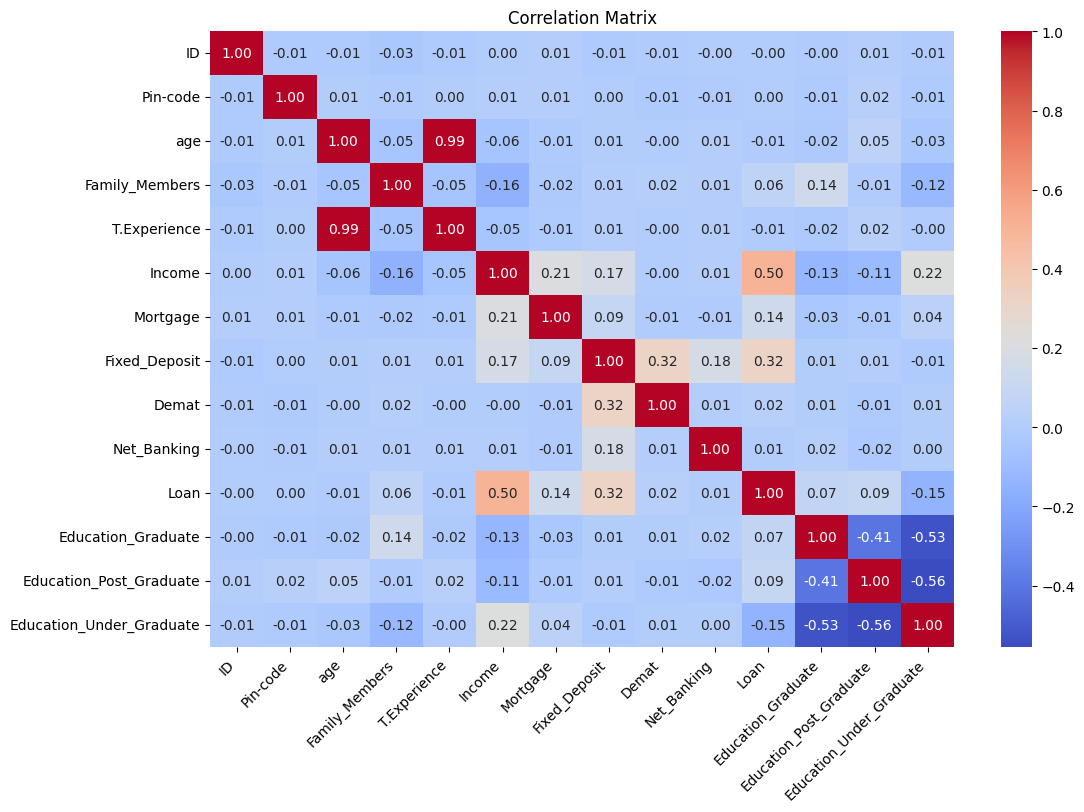

Loan                        1.000000
Income                      0.502462
Fixed_Deposit               0.316355
Mortgage                    0.142095
Education_Post_Graduate     0.090212
Education_Graduate          0.071491
Family_Members              0.061367
Demat                       0.021954
Net_Banking                 0.006278
Pin-code                    0.002344
ID                         -0.000576
age                        -0.007726
T.Experience               -0.007858
Education_Under_Graduate   -0.148894
Name: Loan, dtype: float64


In [126]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))  # Increase figure size for readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()
# Finding the correlation with the target variable
correlation_with_target = df.corr()['Loan'].sort_values(ascending=False)
print(correlation_with_target)

#### We can infer a few things from this correlation heat map

Individuals with higher incomes are more likely to have larger mortgages, own properties, and invest in financial instruments like fixed deposits and demat accounts.

Education level plays a role in determining income, with higher education often leading to higher earnings.

<pre>
Key Observations Regarding Loan:
<ul>
<li><b><u>Loan and Income</b></u> There's a moderate positive correlation between Loan and Income. This suggests that individuals with <b>higher incomes tend to take out more loans</b>.

<li><b><u>Loan and Education</b></u> There's a weak positive correlation between Loan and Education_Graduate. 
                    This might indicate that <b>individuals with graduate degrees are slightly more likely to take out loans</b>, possibly for higher education or business ventures.

<li><b><u>Loan and Fixed Deposit</b></u> There's a weak negative correlation between Loan and Fixed Deposit. 
                    This could suggest that <b>individuals with larger fixed deposits might be less likely to take out loans</b>, as they may have alternative sources of funds.
</ul>
<pre>

Interpreting the Correlations:
<pre>

Based on these correlations, we might infer that:

Individuals with higher incomes are more likely to take out larger loans, possibly for home purchases, investments, or business ventures.
Online banking might facilitate the loan application process, leading to higher number of loan accepts.
Individuals with significant savings might be less likely to need loans.
</pre>

Positive Correlations: The positive correlations between Loan and Income & Loan and Net Banking suggest that these factors might influence the amount or likelihood of taking out a loan.<br>
Negative Correlation: The weak negative correlation between Loan and Fixed Deposit indicates that individuals with substantial savings might be less reliant on loans.

<pre>
<ul type = "square">
<li>Income and Mortgage: A moderately strong positive correlation exists between Income and Mortgage,<br> indicating that <b><u>people earning more high income also tend to have mortgages and higher ones at that</b></u>.
<li>Age and T.Experience: There's a strong positive correlation between Age and T.Experience, since we know that<br> as people get older, they tend to have more experience.
<li>Age and Family Members: There's a weak negative correlation between Age and Family Members.
</pre>

##### However<b> correlation does not also mean causation</b>

While correlations can suggest relationships between variables, they don't prove causation. Further analysis is needed in this case.

### Analyzing how much part does Education plays in recieving loans

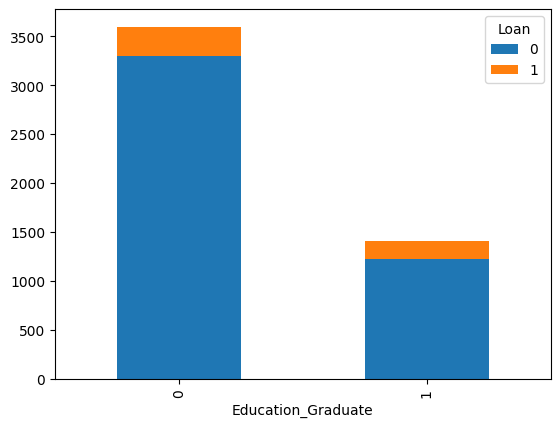

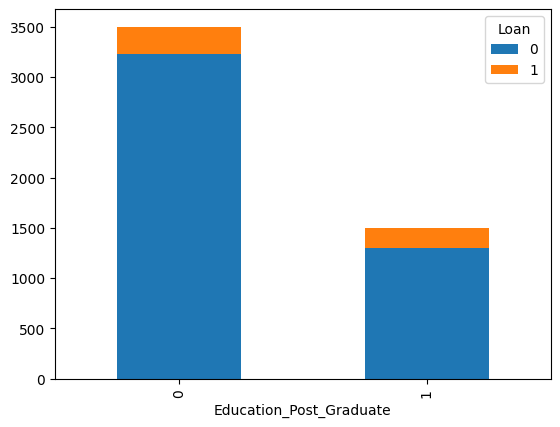

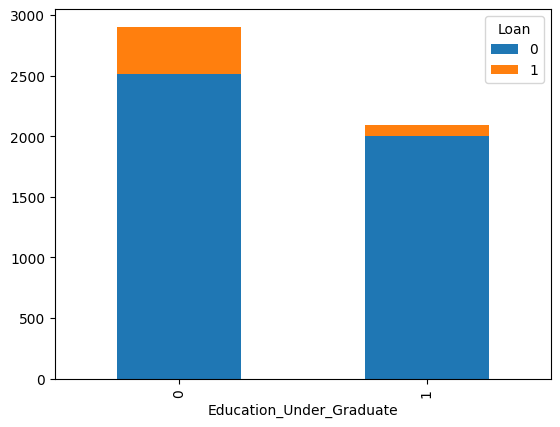

In [127]:
pd.crosstab(df['Education_Graduate'], df['Loan']).plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Education_Post_Graduate'], df['Loan']).plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Education_Under_Graduate'], df['Loan']).plot(kind='bar', stacked=True)
plt.show()

#### Key Findings:
<ul>
<li>Undergraduates: A higher proportion of individuals who are not undergraduates (category 0) have taken out loans compared to those who are undergraduates (category 1).<br>
<li>Post-Graduates: Similar to undergraduates, a higher proportion of individuals who are not post-graduates (category 0) have taken out loans compared to those who are post-graduates (category 1).<br>
<li>Graduates: Again, a higher proportion of individuals who are not graduates (category 0) have taken out loans compared to those who are graduates (category 1).<br>
</pre>

This part was not able to give us sufficient findings and since all the customers are literate and with a minimum of a degree(except Graduate)<br>
it becomes difficult to find out exact reason

### Detailed Analysis

### Distribution of Income

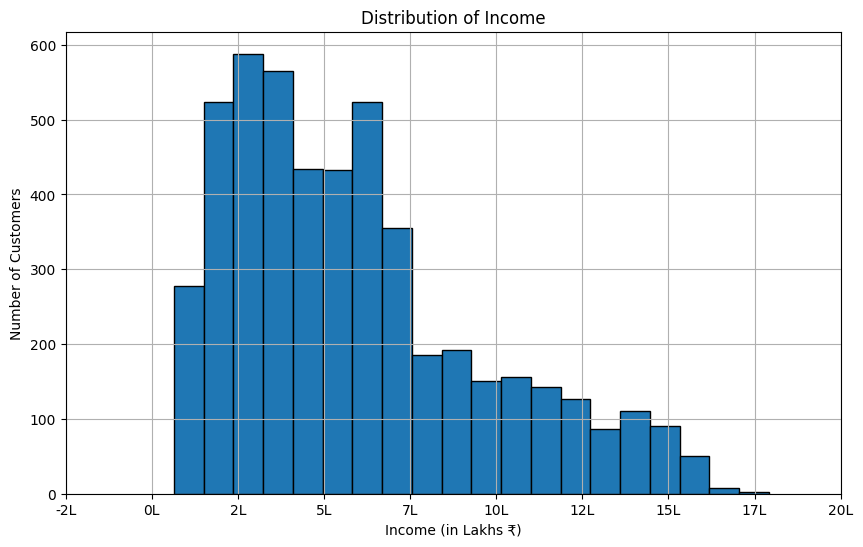

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=20, edgecolor='k')
plt.title('Distribution of Income')
plt.xlabel('Income (in Lakhs ₹)')
plt.ylabel('Number of Customers')
ax = plt.gca()
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels([f'{int(x/100000)}L' for x in ax.get_xticks()]) 
plt.grid(True)
plt.show()

We can see from this histogram that most of the customers are based around <b>2-6 Lacs per annum</b> range.<br>
This indicates that the customer base primarily consists of <b><u>lower to middle income</b></u> groups.

In [130]:

bins = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000]
labels = ['0-2L', '2L-4L', '4L-6L', '6L-8L', '8L-10L', '10L-12L', '12L-14L', '14L-16L', '16L-18L']
df_ = df.copy()

df_['Income'] = pd.cut(df_['Income'], bins=bins, labels=labels)

In [131]:
loan_acceptance_counts = df_[df_['Loan'] == 1].groupby('Income').size()

total_counts = df_.groupby('Income').size()

acceptance_rate = (loan_acceptance_counts / total_counts) * 100

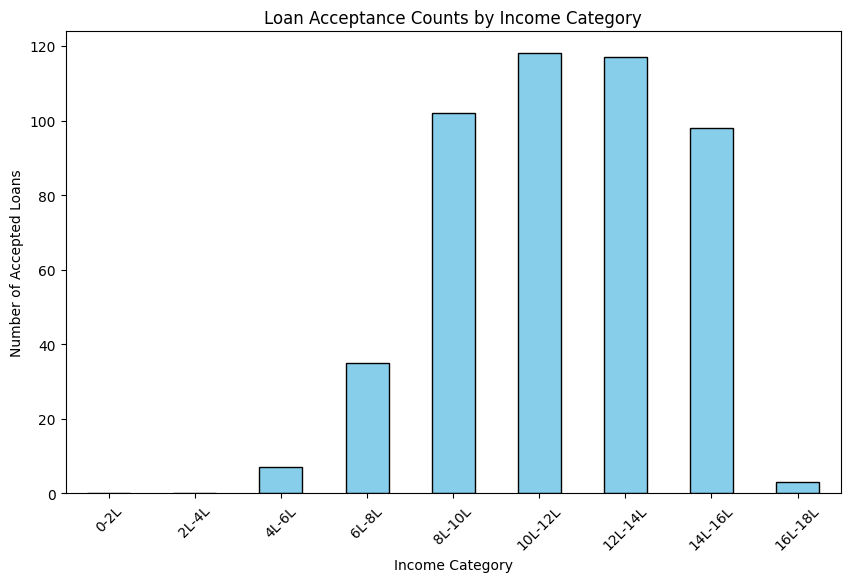

In [132]:
plt.figure(figsize=(10, 6))
loan_acceptance_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Acceptance Counts by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Accepted Loans')
plt.xticks(rotation=45)
plt.show()

From this graph, we can see that the category to accept the most loans is the 8L-16L income categories, with<b> peak at 10L-12L </b>category.

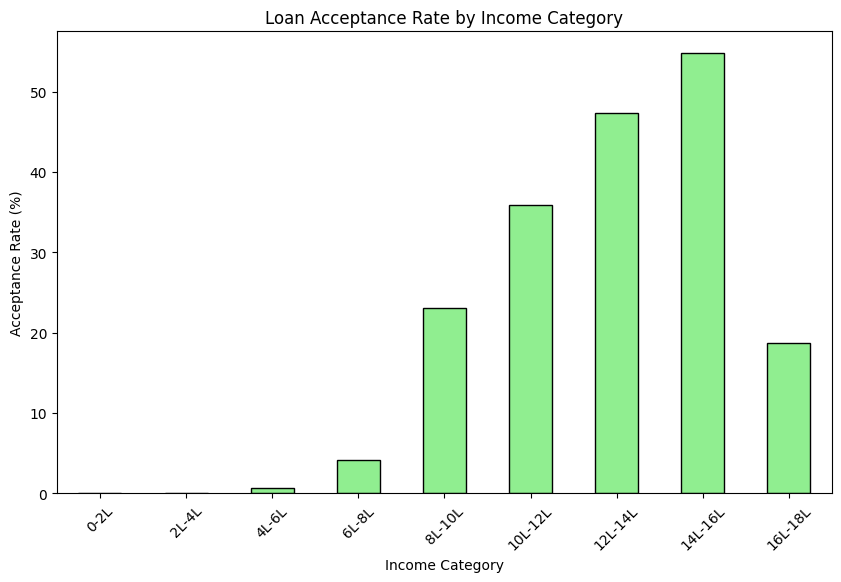

In [133]:
plt.figure(figsize=(10, 6))
acceptance_rate.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Loan Acceptance Rate by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

We can see that the category,<b> 14-16L accepts the most loan offers</b> during the offering rounds.

From these graphs, we can see that Income is not in a linear relationship with loan acceptance.

Loan acceptance rises with increase in proportion to income however at the higher end of the plot, we can see that <b>loan acceptance falls off</b>

<pre>
This can be attributed to several factors:
    1) Customers with lower income may need loan for a variety of reasons however due to their low credit score,
             they might not get the loan approval or even the offer
    2) Customers who lie in the right-most bins of the plot, are the ones with the highest income and 
             hence might not need loans as much the ones on their left
    </pre>

In [134]:
demat_loan_acceptance = df_[df_['Loan'] == 1].groupby(['Income', 'Demat']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

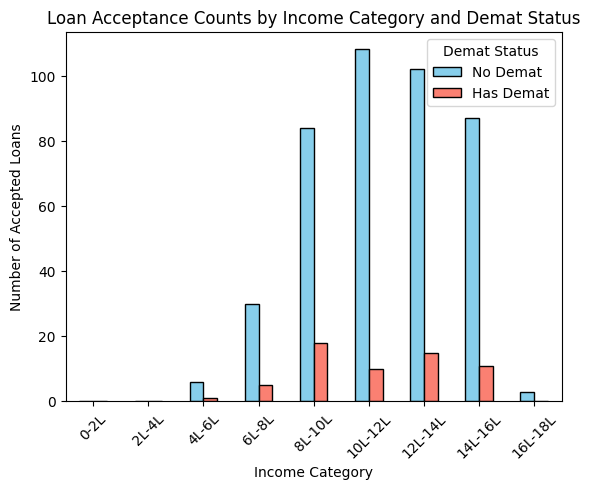

In [135]:
plt.figure(figsize=(12, 6))
demat_loan_acceptance.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Loan Acceptance Counts by Income Category and Demat Status')
plt.xlabel('Income Category')
plt.ylabel('Number of Accepted Loans')
plt.xticks(rotation=45)
plt.legend(title='Demat Status', labels=['No Demat', 'Has Demat'])
plt.show()

From this, we can see that Demat is not an appropriate or a reliable indicator of loan acceptance since it does not appear to show a concise relation.

### Distribution of Age

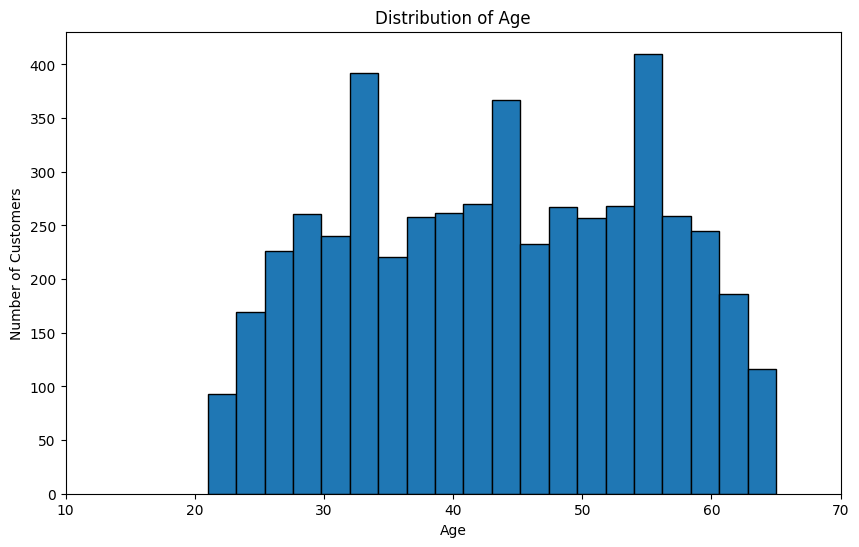

In [136]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
ax = plt.gca()
ax.set_xticks(ax.get_xticks())  
plt.show()

From this histogram, we can conclude that:
<br><ul>
<li> Majority of customer age is  around 30 to 55 years of age.
<li> There are a few customers who are above 60 years of age or below 25 years of age.
</ul>

### Net Banking

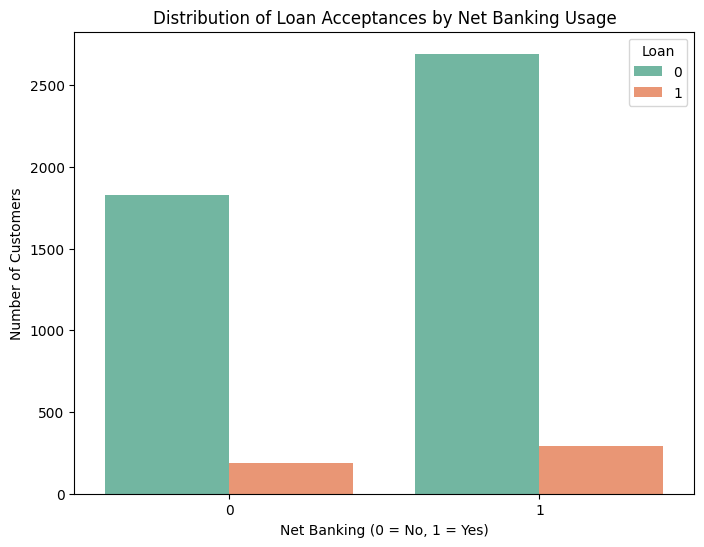

In [137]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Net_Banking', hue='Loan', data=df, palette='Set2')

plt.xlabel('Net Banking (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Loan Acceptances by Net Banking Usage')
plt.legend(title='Loan', loc='upper right')
plt.show()

From this plot, it is evident that people who are more comfortable with Net Banking are more inclined to accept loan offers<br>
However, the difference is not too great so<b> Net Banking</b> too is <b>not a good indicator of loan acceptance</b>.

<pre>On X-axis, we have the number of customers and in case, you were wondering why there is only 2500 maximum count<br>
I have split the counts for those who do Net Banking and those who do not.<br>
Making the sum 2500*2 = 5000 which is the number of customer data provided</pre>

In [138]:
print(df.shape)
print("Customer's data:", df['Net_Banking'].value_counts(), "\n1 is Yes and 0 is No")

(5000, 14)
Customer's data: Net_Banking
1    2984
0    2016
Name: count, dtype: int64 
1 is Yes and 0 is No


### Fixed Deposit

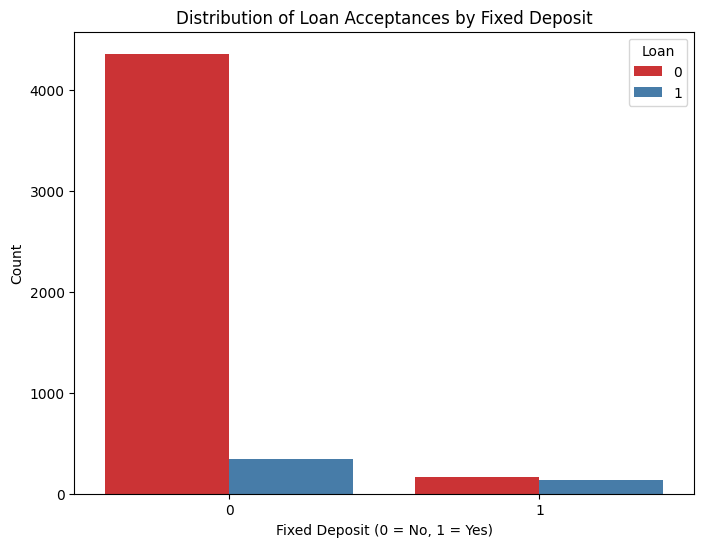

In [139]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fixed_Deposit', hue='Loan', data=df, palette='Set1')
plt.xlabel('Fixed Deposit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Loan Acceptances by Fixed Deposit')
plt.legend(title='Loan', loc='upper right')
plt.show()

From this plot, it seems that most of the bank's customers do not have Fixed Deposits.<br>
Those who do, majority of them do not accept Loans<br>
This means that Fixed Deposit, although not to a greater degree but it does affect Loan as<br>
<b>Customers with Fixed Deposits are less inclined to accept loan offers</b>.

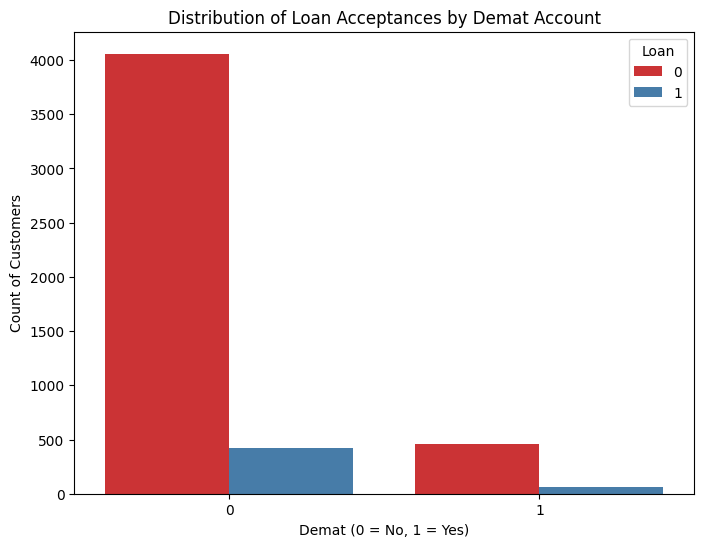

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Demat', hue='Loan', data=df, palette='Set1')
plt.xlabel('Demat (0 = No, 1 = Yes)')
plt.ylabel('Count of Customers')
plt.title('Distribution of Loan Acceptances by Demat Account')
plt.legend(title='Loan', loc='upper right')
plt.show()

From this plot, we can see that Demat, while affecting Loan acceptances, is not a good indicator of Loan Acceptances.<br>
However, we can see that those who do have a Demat Account mostly do not accept loan offers.

## In short,
<ul>
<li>Bank mostly serves nuclear families(1-4 members)
<li>Ages range from <b>21 to 65 years</b> and <b>peak around 30 to 55 years</b> of age
<li>Income levels of bank's customers are diverse
<li>Individuals with<b> larger fixed deposits might be less likely to take out loans</b>
<li>Customers who use online banking are more likely to apply for loans online
<li>Individuals with<b> lower education levels are more likely to take out loans</b>
<li>Bank serves customer mostly based around 2 to 6 lacs per annum range while catering to high and low ends too.
</ul>

Broadly speaking, all the features except ID, affect Loan acceptances in varying degrees.<br>
Some, have a greater effect, like Income while some have minimal, like Net Banking.

Now, we have enough insights and relations from the visualizations, we shall now proceed on to the Preprocessing step.

## Preprocessing the dataset

### Splitting the dataset into features and target dataframe

Splitting the target variable "Loan" from the main dataset

In [141]:
target = df['Loan']
features = df.drop(columns=['Loan', 'ID'])

We also dropped ID and Pin-code as we saw from the data analysis that they have minimum to no effect on the loan acceptance.

Verifying the split

In [142]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Loan
Non-Null Count  Dtype
--------------  -----
5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB


In [143]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pin-code                  5000 non-null   int64  
 1   age                       5000 non-null   int64  
 2   Family_Members            5000 non-null   float64
 3   T.Experience              5000 non-null   float64
 4   Income                    5000 non-null   int64  
 5   Mortgage                  5000 non-null   int64  
 6   Fixed_Deposit             5000 non-null   int32  
 7   Demat                     5000 non-null   int32  
 8   Net_Banking               5000 non-null   int32  
 9   Education_Graduate        5000 non-null   int64  
 10  Education_Post_Graduate   5000 non-null   int64  
 11  Education_Under_Graduate  5000 non-null   int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 410.3 KB


In [144]:
features.head()

,Pin-code,age,Family_Members,T.Experience,Income,Mortgage,Fixed_Deposit,Demat,Net_Banking,Education_Graduate,Education_Post_Graduate,Education_Under_Graduate
0,110001,23,4.0,1.0,392000,0,0,1,0,0,0,1
1,110014,43,3.0,19.0,272000,0,0,1,0,0,0,1
2,110014,37,1.0,15.0,88000,0,0,0,0,0,0,1
3,110003,33,1.0,9.0,800000,0,0,0,0,1,0,0
4,110004,33,4.0,8.0,360000,0,0,0,0,1,0,0


Before splitting the dataset, let us check the counts of Loan

In [146]:
df['Loan'].value_counts()

Loan
0    4520
1     480
Name: count, dtype: int64

As I expected, loan datasets rarely have balanced target values<br>
This means, we would need to make sure that post-split datasets have consistent feature-target ratio.

### Splitting the dataset into Train-Test Pairs

In [147]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

I have split the dataset into 80:20 ratio.<br>
80 for Training Set<br>
20 for Testing Set

I have also stratified target(Loan) for balanced data.

Verifying the split

In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 408 to 4785
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pin-code                  4000 non-null   int64  
 1   age                       4000 non-null   int64  
 2   Family_Members            4000 non-null   float64
 3   T.Experience              4000 non-null   float64
 4   Income                    4000 non-null   int64  
 5   Mortgage                  4000 non-null   int64  
 6   Fixed_Deposit             4000 non-null   int32  
 7   Demat                     4000 non-null   int32  
 8   Net_Banking               4000 non-null   int32  
 9   Education_Graduate        4000 non-null   int64  
 10  Education_Post_Graduate   4000 non-null   int64  
 11  Education_Under_Graduate  4000 non-null   int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 359.4 KB


In [149]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2388 to 686
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pin-code                  1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   Family_Members            1000 non-null   float64
 3   T.Experience              1000 non-null   float64
 4   Income                    1000 non-null   int64  
 5   Mortgage                  1000 non-null   int64  
 6   Fixed_Deposit             1000 non-null   int32  
 7   Demat                     1000 non-null   int32  
 8   Net_Banking               1000 non-null   int32  
 9   Education_Graduate        1000 non-null   int64  
 10  Education_Post_Graduate   1000 non-null   int64  
 11  Education_Under_Graduate  1000 non-null   int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 89.8 KB


In [150]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4000 entries, 408 to 4785
Series name: Loan
Non-Null Count  Dtype
--------------  -----
4000 non-null   int32
dtypes: int32(1)
memory usage: 46.9 KB


In [151]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1000 entries, 2388 to 686
Series name: Loan
Non-Null Count  Dtype
--------------  -----
1000 non-null   int32
dtypes: int32(1)
memory usage: 11.7 KB


The Train-Test pairs both add up to the original rows.

The splits were successful.

## Building the model

#### First, lets prepare a baseline model

## k-Nearest Neighbour Algorithm

kNN is a lazy learning model whose main parameter is distance.

We shall use Scaling to get the highest performance out of this algorithm.

In [152]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

I used Robust Scaler as this specific Scaling method is robust to outliers and our model has a lot of outliers, specifically in Income and Mortgage,<br>
both of which will surely be important features of the models

In [153]:
knn = KNeighborsClassifier(n_neighbors=5) #19Initialisation of model
knn.fit(X_train_scaled, y_train)
print("Testing set score:", knn.score(X_test_scaled, y_test))
print("Training set score:", knn.score(X_train_scaled, y_train)) 

Testing set score: 0.963
Training set score: 0.971


## NOTICE TO READERS AND ORGANIZERS

I have performed extensive hyperparameter tuning, both using GridSearches and Manual method.<br>
They will not be shown here since if I did, total cells of this notebook would amount to 1000+ and would needlessly clutter up and prevent focus on otherwise important information.<br>
<b>Only the tried-and-perfected parameters will be shown here</b>.

For our<b> base model, 96.3% accuracy</b> is fantastic.<br>
However, we also need to check the accuracy throughout the dataset,<br>
for which we will be using Cross-Validation methods.

In [154]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf)

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.9625 0.965  0.9575 0.9725 0.975  0.9525 0.965  0.9625 0.935  0.97  ]
Mean Accuracy: 0.9618
Standard Deviation: 0.0110


Throughout the folds, we can see that the model is consistent with a standard deviation of 0.011, <br>
this result is acceptable for a baseline model

Now, lets proceed on to make higher performing model now that we know the baseline score.

## GradientBoostingClassifier

In [155]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.04, max_depth=3, max_features='sqrt')
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.04, max_features='sqrt',
                           n_estimators=500)

In [157]:
print("Test Score:", gbc.score(X_test, y_test))
print("Train Score:", gbc.score(X_train, y_train))
print("Score difference:", gbc.score(X_train, y_train) - gbc.score(X_test, y_test))

Test Score: 0.986
Train Score: 0.9905
Score difference: 0.0045000000000000595


We achieved a test score of 98.6 which is expected from Gradient Boosting Machines

The Score difference is moderate, which tells us that the model is overfitting a bit.

In [158]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(gbc, X_train, y_train, cv=skf)

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.9825 0.985  0.9775 0.98   0.975  0.9775 0.9825 0.9825 0.9675 0.9725]
Mean Accuracy: 0.9783
Standard Deviation: 0.0051


Now, lets look over at the feature importances <b> as per our trained GBC model</b>

In [159]:
feature_importances = gbc.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {100*importance:.3f}")

Pin-code: 0.299
age: 0.817
Family_Members: 7.544
T.Experience: 0.691
Income: 61.739
Mortgage: 4.185
Fixed_Deposit: 6.961
Demat: 0.110
Net_Banking: 0.318
Education_Graduate: 2.278
Education_Post_Graduate: 3.390
Education_Under_Graduate: 11.666


We can infer from this that, Income is the most important feature that was selected by the model.<br>
Lets have a look at the graph for better understanding.

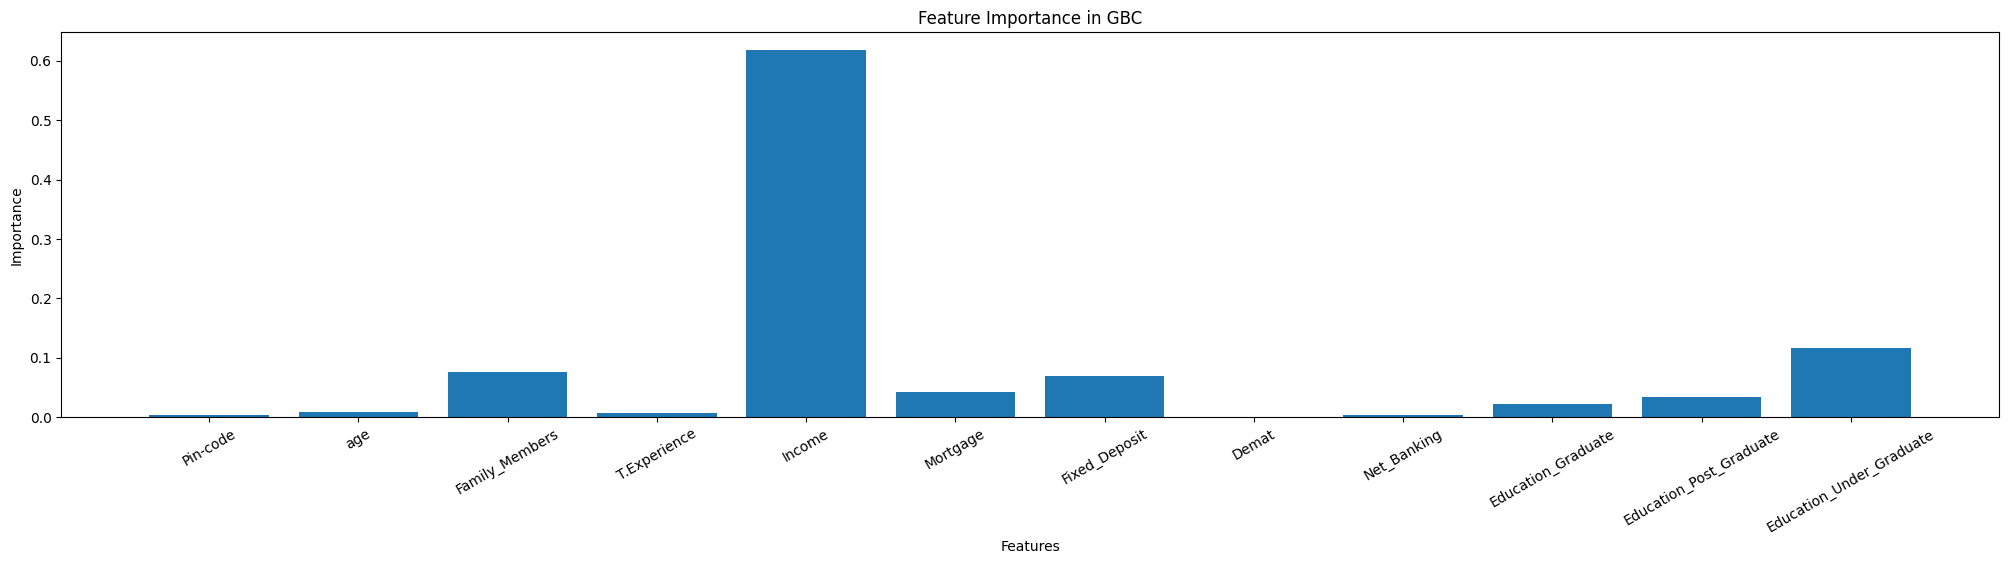

In [160]:
plt.figure(figsize=(25, 5))
plt.bar(X_train.columns, feature_importances)
plt.xticks(rotation=30)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in GBC")
plt.show()

The most important features used here are:
<pre>
1. Income
2. UG Education
3. Family Members
4. Fixed Deposit
</pre>

I am worried that the model might be getting too dependent on income feature however that is expected as its one of the most correlated feature<br>
as we had seen from the visualizations

Let us try out Random Forest algorithm for combating Overfitting which might have been caused due to scaling issues.

## Random Forest

Random Forest and other tree based models are used when the data is skewed and outliers exist since these models are robust to such data problems

In [161]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split=3, max_depth=10, random_state=2024, max_features='log2')
rf.fit(X_train, y_train)
print("Training set score:", rf.score(X_train, y_train)) 
print("Testing set score:", rf.score(X_test, y_test))

Training set score: 0.99175
Testing set score: 0.985


In [162]:
print("Score difference:", rf.score(X_train, y_train) - rf.score(X_test, y_test))

Score difference: 0.006750000000000034


Random Forest model, as expected, scored less than the GBM Classifier used earlier however, I used this model to view its effectiveness against over-fitting,<br> which unfortunately is still present.

In [163]:
feature_importances = rf.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {100*importance:.3f}")

Pin-code: 1.580
age: 3.537
Family_Members: 10.440
T.Experience: 3.380
Income: 49.699
Mortgage: 5.435
Fixed_Deposit: 6.858
Demat: 0.618
Net_Banking: 0.707
Education_Graduate: 3.627
Education_Post_Graduate: 4.090
Education_Under_Graduate: 10.030


Studying the Feature Importance graph of Random Forest

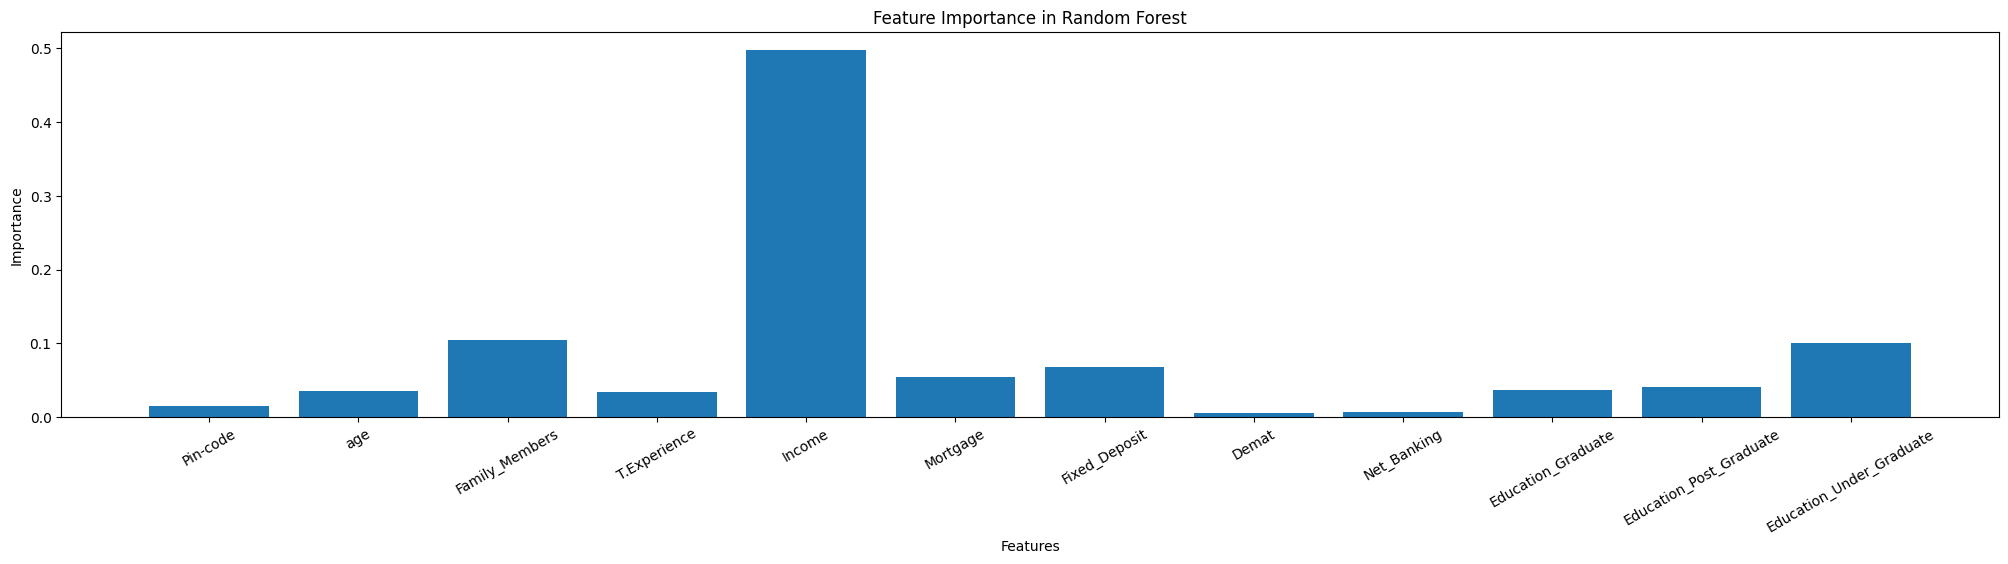

In [164]:
plt.figure(figsize=(25, 5))
plt.bar(X_train.columns, feature_importances)
plt.xticks(rotation=30)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

Its interesting to notice here that, RF did not give as much importance to Income as GBC.

## HistGBC

In [167]:
histgbm = HistGradientBoostingClassifier(max_iter=1000, learning_rate=0.02, max_depth = 3, l2_regularization=0.9, max_leaf_nodes=10)
histgbm.fit(X_train, y_train)
print("Test Score:", histgbm.score(X_test, y_test))
print("Train Score", histgbm.score(X_train, y_train))
print("Score Difference:", histgbm.score(X_train, y_train) - histgbm.score(X_test, y_test))

Test Score: 0.988
Train Score 0.98975
Score Difference: 0.0017500000000000293


A Gradient Boosting model works by combining weak learners and hence get the most accuracy.

This is performing better than previous selected models.

HistGBC is inspired by the powerful LightGBM model developed by Microsoft and it uses histogram-based gradient boosting.

In [168]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(histgbm, X_train, y_train, cv=skf)

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.9825 0.98   0.975  0.9775 0.975  0.9725 0.9775 0.985  0.9725 0.9725]
Mean Accuracy: 0.9770
Standard Deviation: 0.0042


Generating Classification Report cum Confusion Matrix for this model to study the result

In [169]:
y_pred = histgbm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[900   4]
 [  8  88]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.92      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



We can see that this model is exceptionally good at recall score of loan rejections<br>
while a suffering a bit lower loan accepting score.

Lets analyze this model's feature importance ranking

In [170]:
# Lets do Permutation importance
result = permutation_importance(histgbm, X_test, y_test, n_repeats=10, random_state=42)

for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]*100:.3f} +/- {result.importances_std[i]*100:.3f}")


Income: 19.780 +/- 0.481
Education_Under_Graduate: 7.850 +/- 0.610
Family_Members: 6.370 +/- 0.657
age: 0.770 +/- 0.155
T.Experience: 0.500 +/- 0.195
Fixed_Deposit: 0.310 +/- 0.170
Pin-code: 0.200 +/- 0.134
Net_Banking: 0.120 +/- 0.075
Mortgage: 0.090 +/- 0.083
Education_Post_Graduate: 0.030 +/- 0.046
Education_Graduate: 0.000 +/- 0.000
Demat: -0.120 +/- 0.060


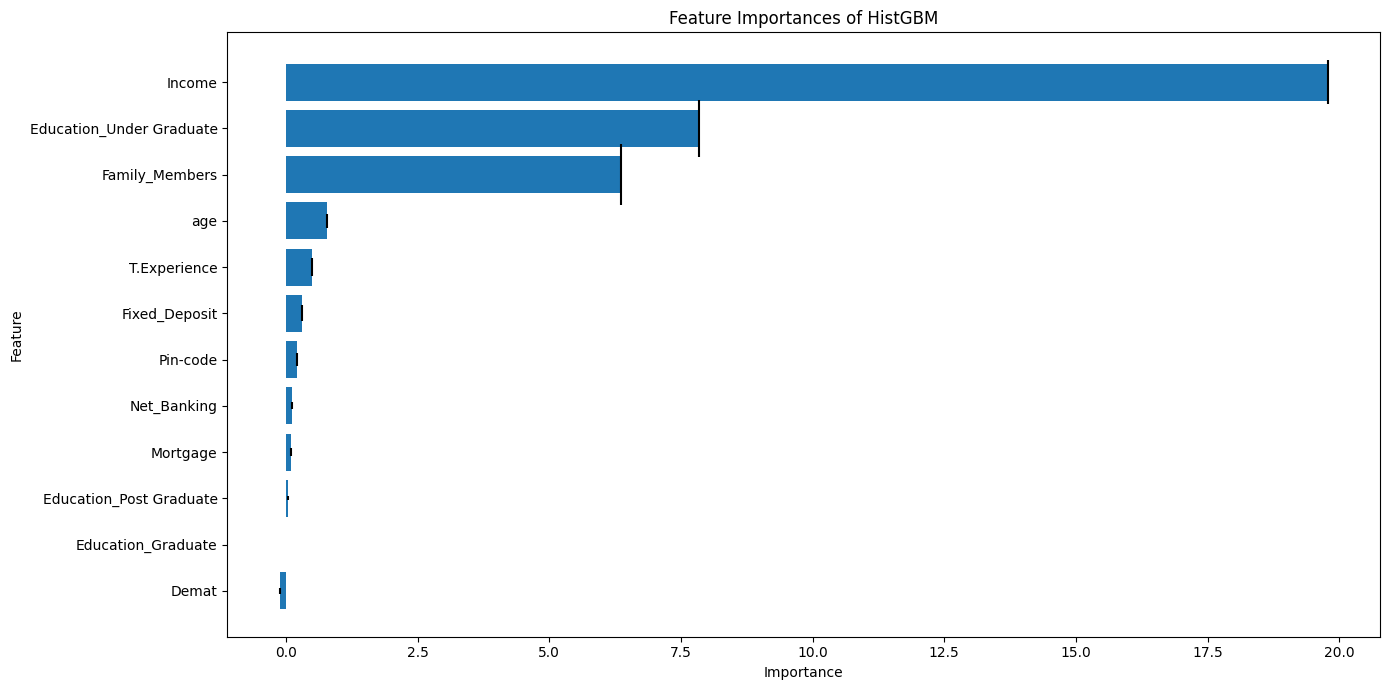

In [171]:
features = [
    "Income", "Education_Under Graduate", "Family_Members", "age", "T.Experience",
    "Fixed_Deposit", "Pin-code", "Net_Banking", "Mortgage", "Education_Post Graduate",
    "Education_Graduate", "Demat"
]
importances_mean = [
    19.780, 7.850, 6.370, 0.770, 0.500, 0.310, 0.200, 0.120, 0.090, 0.030, 0.000, -0.120
]
importances_std = [
    0.481, 0.610, 0.657, 0.155, 0.195, 0.170, 0.134, 0.075, 0.083, 0.046, 0.000, 0.060
]

indices = np.argsort(importances_mean)[::-1]
plt.figure(figsize=(14, 7))
plt.barh(range(len(importances_mean)), np.array(importances_mean)[indices], yerr=np.array(importances_std)[indices], align='center')
plt.yticks(range(len(importances_mean)), [features[i] for i in indices])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importances of HistGBM')
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()

HistGBC gave massive importance to Income feature for predicting loan however, UG Education and Family Members were also given substantial importance as well

Let us employ SHAP to understand this result better

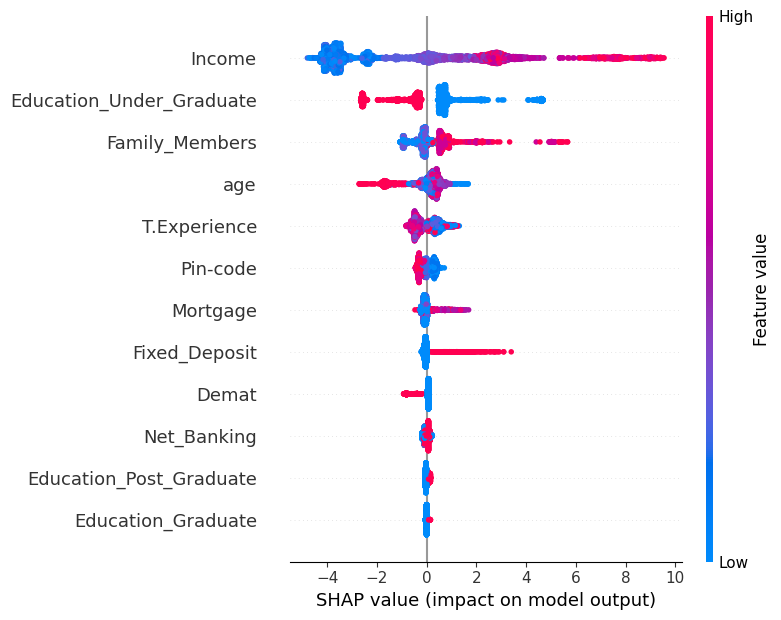

In [172]:
# Initializing TreeExplainer
explainer = shap.TreeExplainer(histgbm)

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


From this plot, we can see that higher income results in positive model performance however the dis-continuous line tells us that <br>
<b>Income is not directly proportional to Loan acceptance.</b>

Now that we know, that the features are not linearly related to Target feature Loan, let us employ a kernelized Support Vector Machine

## Kernelized SVC

In [173]:
svm_model = SVC(max_iter=300, kernel='rbf', C=3)#3
svm_model.fit(X_train_scaled, y_train)
print("Test Set Accuracy: ", svm_model.score(X_test_scaled, y_test))
print("Train Set Accuracy: ", svm_model.score(X_train_scaled, y_train))

Test Set Accuracy:  0.982
Train Set Accuracy:  0.9855


In [174]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=skf)
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.9875 0.985  0.9775 0.98   0.98   0.9825 0.98   0.98   0.965  0.9675]
Mean Accuracy: 0.9785
Standard Deviation: 0.0067


The reason I chose a non-linear SVC is because unlike linear models which try to fit data on a plane.<br>
This model plots a hyper-plane which helps it capture underlying complex interactions properly.

The lower accuracy score compared to other models was also expected since I have been studying some Research papers** based on Loans and they show similar findings<br>
SVM consistenly scores lower than other models.

<pre>**Dansana D, Patro SGK, Mishra BK, Prasad V, Razak A, Wodajo AW. Analyzing the impact of loan features on bank loan prediction using Random Forest algorithm. Engineering Reports. 2024;6(2):e12707. doi: 10.1002/eng2.12707</pre>

## LightGBM

In [175]:
lgbm = LGBMClassifier(
    reg_lambda=8.0, num_leaves=10, max_depth=3, n_estimators=5000, reg_alpha=0.1, min_child_samples=60, max_bin=500, min_child_weight=0.1, scale_pos_weight=0.8,
    metric='binary_logloss',
    learning_rate = 0.009,
    n_jobs=6,
    random_state=42, verbose=-1,
    boosting_type='goss'
)
lgbm.fit(X_train, y_train)
test_accuracy = lgbm.score(X_test, y_test)
train_accuracy = lgbm.score(X_train, y_train)
print("Test Set Accuracy:", test_accuracy)
print("Train Set Accuracy:", train_accuracy)

Test Set Accuracy: 0.988
Train Set Accuracy: 0.9885


This is LightGBM, a framework based on Gradient Boosting Machines which learn by iteratively combining weak learners.<br>
This is developed by Microsoft and is one of the best models available for working on larger datasets.

In [177]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=6, verbose=1)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Cross-Validation Accuracy Scores: [0.9825 0.9825 0.9775 0.98   0.975  0.98   0.9825 0.98   0.97   0.9775]
Mean Cross-Validation Accuracy: 0.9787500000000001
Standard Deviation: 0.0037500000000000163


[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    4.9s finished


LightGBM's high accuracy is a testament to its strength!<br>

Although, we are not overfitting and 98.8% accuracy means our model is generalizing well.

In [178]:
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Training Precision: 0.9971
Training Recall: 0.8828
Training F1 Score: 0.9365
Test Precision: 0.9565
Test Recall: 0.9167
Test F1 Score: 0.9362


A F1 Score score of 93.62 is really good and further more, we notice no obvious overfitting!

Our model seems to have a higher Recall score on test set compared to training set, which means it is performing well on unseen data.

Lets plot a Feature Importance Graph

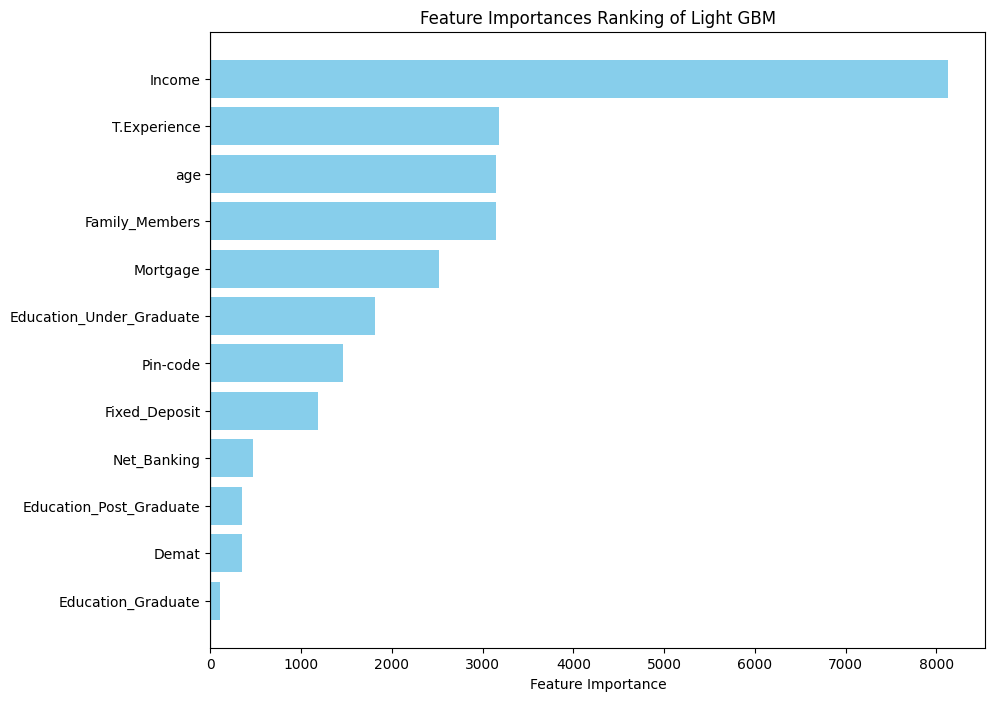

In [180]:
feature_importances = lgbm.feature_importances_
feature_names = X_train.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

top_features = importances_df.reindex(importances_df['Importance'].sort_values(ascending=False).index).head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color=['skyblue' if x > 0 else 'salmon' for x in top_features['Importance']])
plt.axvline(0, color='black', linewidth=0.8) 
plt.xlabel('Feature Importance')
plt.title('Feature Importances Ranking of Light GBM')
plt.gca().invert_yaxis()
plt.show()


Here, it is interesting to note that T.Experience, age and Family member features are being given almost equal importance.<br>
And overall, every feature seems to be contributing to the final score.<br>
This means that there is no un-related feature in this dataset.

Let us plot SHAP of this model too, to understand the nuances of the data

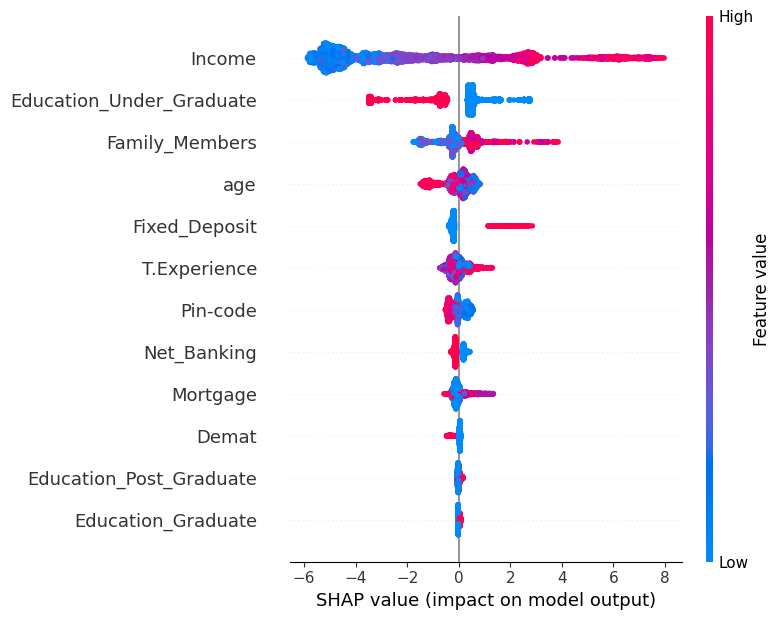

In [181]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

SHAP confirms our findings of non-linear features

Let us plot a ROC-AUC curve for final model testing

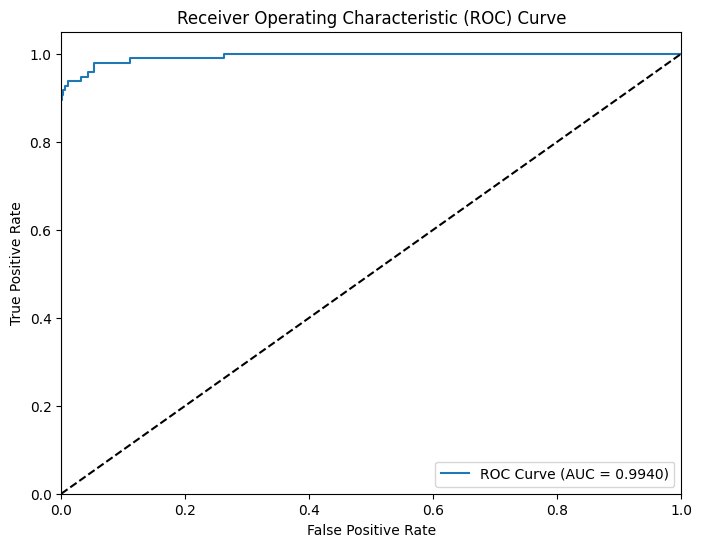

In [182]:
y_test_proba = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)


auc_score = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A AUC score of 99.4 very high and means that our model is able to differentiate between the classes very well!

Now, let us apply polynomial features in order to capture the underlying complex feature interactions

## Applying polynomial features

### to Logistic Regression

In [183]:
poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear', max_iter=100, C=0.2))
])

poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)

print(f'Accuracy with Polynomial Features: {accuracy_score(y_test, y_pred)}')

Accuracy with Polynomial Features: 0.977


I used Logistic Regression as a baseline for Polynomial features and it seems to be working quite good.

In [184]:
poly.score(X_train, y_train)

0.9775

One thing to know is that, models like Logistic Regression love having more feature and are able to fit highly in such datasets.

### to Random Forest

In [185]:
poly_rf = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('feature_selection', SelectFromModel(rf)),
    ('rf', RandomForestClassifier(n_estimators=300, min_samples_split=3, max_depth=8, random_state=2024, max_features='log2'))
])

poly_rf.fit(X_train, y_train)
y_pred = poly_rf.predict(X_test)

print(f'Accuracy with Random Forest: {accuracy_score(y_test, y_pred)}')

Accuracy with Random Forest: 0.988


In [187]:
print("Training Score: ", poly_rf.score(X_train, y_train))

Training Score:  0.98925


Rigorous Testing of model on various metrics

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.91      0.94        96

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [189]:
cv_scores = cross_val_score(poly_rf, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation score:", cv_scores.std())

Cross-validation scores: [0.985  0.985  0.9925 0.98   0.975  0.9825 0.9725 0.98   0.975  0.9825]
Mean cross-validation score: 0.9810000000000001
Standard deviation of cross-validation score: 0.005612486080160923


In [190]:
y_train_pred = poly_rf.predict(X_train)
y_test_pred = poly_rf.predict(X_test)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Training Precision: 1.0000
Training Recall: 0.8880
Training F1 Score: 0.9407
Test Precision: 0.9667
Test Recall: 0.9062
Test F1 Score: 0.9355


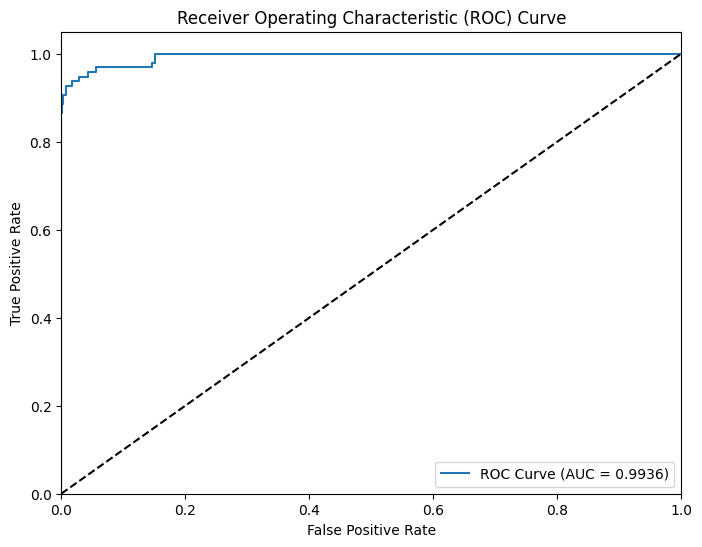

In [191]:
y_test_proba = poly_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Testing Results:
<pre>
1. AUC Score = 99.36   Model is able to differentiate between classes extremely well.
2. With mean Cross Validation score of 98.1, this is our most consistent performing model.
3. Accuracy of <b>98.8</b> means model performs exceptionally well.
4. Low score difference signify that <b> Overfitting is not an issue</b>
</pre>

Let us plot the Top 20 Features as ranked by our model

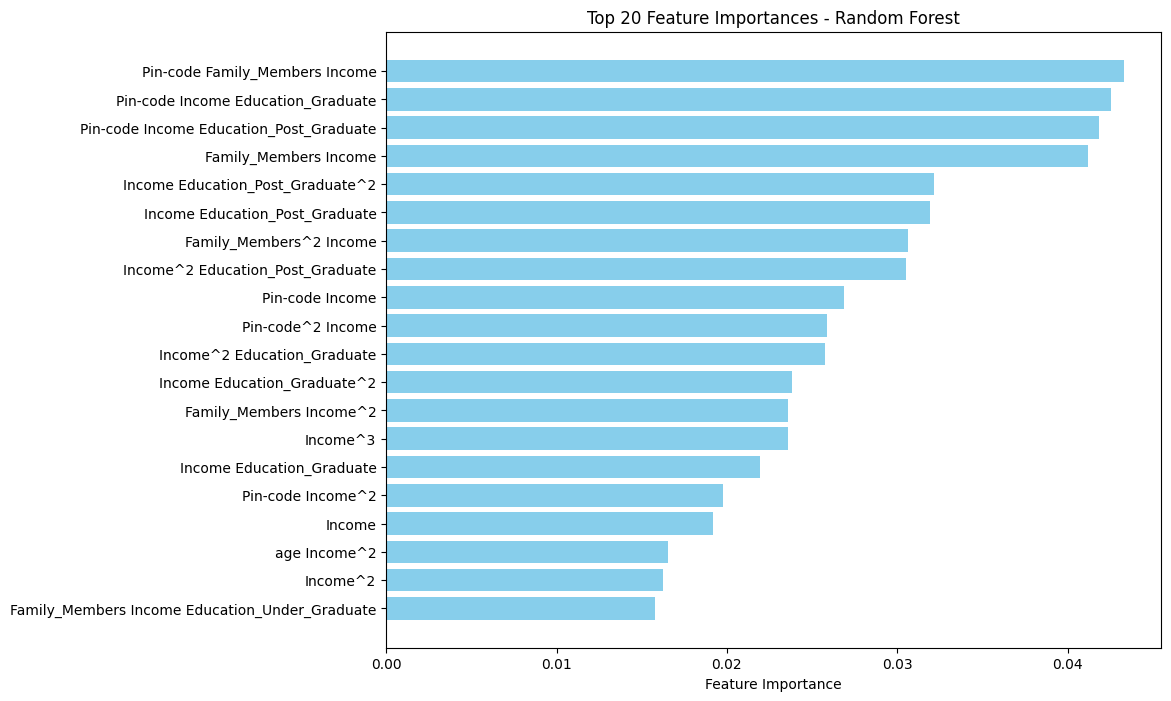

In [192]:
rf_model = poly_rf.named_steps['rf']

feature_importances = rf_model.feature_importances_

poly = poly_rf.named_steps['poly']
feature_names = poly.get_feature_names_out(X_train.columns)

if 'feature_selection' in poly_rf.named_steps:
   
    mask = poly_rf.named_steps['feature_selection'].get_support()
    
    feature_names = feature_names[mask]

assert len(feature_names) == len(feature_importances), "Mismatch between feature names and importances"

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_features = importances_df.sort_values(by='Importance', ascending=False).head(20)

# Lets Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances - Random Forest')
plt.gca().invert_yaxis()  
plt.show()

### This is a great finding !

Namely because I had not realized the importance of Pin-codes till yet.<br>
Pin-codes give us the locality of customers and localities tell us all about their professional background to the number of their family members.

and the most important parameter we got was an interaction between<br>
<b>Pin-code, Family_Members and Income</b>

Let us analyze the feature Pin-code on the basis of our model's findings

## Pin-code

In [193]:
df['Pin-code'].value_counts()

Pin-code
110004    1024
110001    1021
110011     991
110014     989
110003     975
Name: count, dtype: int64

In total, a set of 5 pin codes are given.

These pin codes correspond to different locality but all in the region of New Delhi(Delhi NCR), India

In [194]:
grouped_data = df.groupby('Pin-code')['Loan'].value_counts().unstack()

total_loans = grouped_data.sum(axis=1)

acceptance_percentage = (grouped_data[1] / total_loans) * 100
rejection_percentage = (grouped_data[0] / total_loans) * 100

result_df = pd.DataFrame({'Pin-code': grouped_data.index, 'Loan Accepted (%)': acceptance_percentage, 'Loan Rejected (%)': rejection_percentage})

pin_code_to_locality = {
    110001: 'Connaught Place',
    110003: 'Lodhi Road',
    110004: 'Gole Market',
    110011: 'India Gate',
    110014: 'Lajpat Nagar',
 
}

result_df['Locality'] = result_df['Pin-code'].map(pin_code_to_locality)
result_df = result_df[['Locality', 'Pin-code', 'Loan Accepted (%)', 'Loan Rejected (%)']]
print(result_df)

                 Locality  Pin-code  Loan Accepted (%)  Loan Rejected (%)
Pin-code                                                                 
110001    Connaught Place    110001           8.521058          91.478942
110003         Lodhi Road    110003           9.743590          90.256410
110004        Gole Market    110004          10.449219          89.550781
110011         India Gate    110011          10.393542          89.606458
110014       Lajpat Nagar    110014           8.897877          91.102123


From this dataframe, we can see the locality and the Loan acceptance rate of each.

The highest is of<b> Gole Market</b> and a slightly lower acceptance rate is of <b>India Gate</b>

This tells us that customers are based in and around Central Delhi

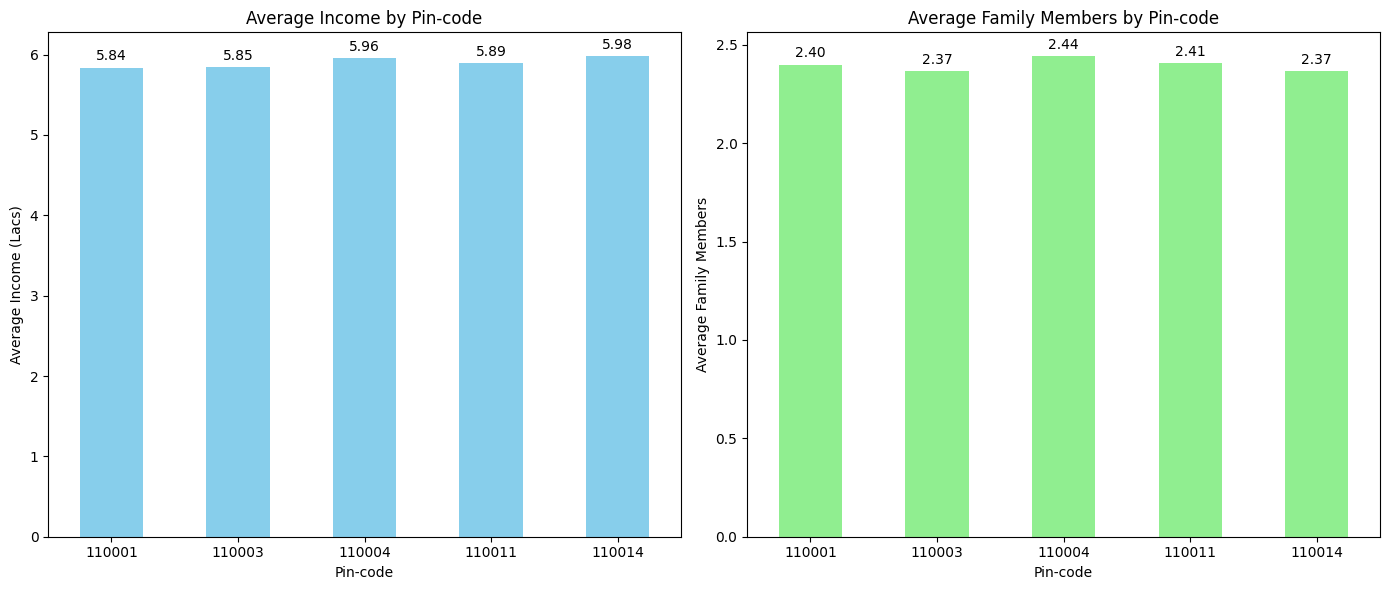

In [195]:
df['Income_Lacs'] = df['Income'] / 100000

income_by_pin = df.groupby('Pin-code')['Income_Lacs'].mean()
family_members_by_pin = df.groupby('Pin-code')['Family_Members'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = income_by_pin.plot(kind='bar', color='skyblue')
plt.xlabel('Pin-code')
plt.ylabel('Average Income (Lacs)')
plt.title('Average Income by Pin-code')
plt.xticks(rotation=0)  

for p in ax1.patches:
    value = p.get_height()
    ax1.annotate(f'{value:.2f}', 
                  (p.get_x() + p.get_width() / 2., value), 
                  ha='center', va='bottom', xytext=(0, 3), 
                  textcoords='offset points', fontsize=10)

plt.subplot(1, 2, 2)
ax2 = family_members_by_pin.plot(kind='bar', color='lightgreen')
plt.xlabel('Pin-code')
plt.ylabel('Average Family Members')
plt.title('Average Family Members by Pin-code')
plt.xticks(rotation=0) 

for p in ax2.patches:
    value = p.get_height()
    ax2.annotate(f'{value:.2f}', 
                  (p.get_x() + p.get_width() / 2., value), 
                  ha='center', va='bottom', xytext=(0, 3), 
                  textcoords='offset points', fontsize=10)
    
plt.tight_layout()
plt.show()

We can see that the highest Average income belongs to 110004 which also has the highest Loan Acceptance Rate !

We can also see that the average family members are also higher in this locality.

And according to our model, these three sets of parameters give us the <b>MOST IMPORTANT TARGETTING FEATURE</b> of all

# Predictions

After rigorous testing of different models, we came to the best performing model of Random Forest coupled with Feature Selector for <br>removing useless feature interaction which would have introduced needless noise in the data.

<pre>
    Key Predictors:
        The top three most important features are interaction terms involving<b> Pin-code, Family Members, and Income</b>, highlighting their strong combined influence on loan acceptance decisions.
        Family Members, Income and Income-Education interactions are also significant, reflecting the<b> importance of financial status and education level</b>.

    Importance of Education:
        Features involving Education (Graduate, Post Graduate) appear multiple times, indicating that the<b> level of education plays a crucial role in predicting loan acceptance</b>, especially when combined with other factors like income and locality.

    Complex Interactions:
        Higher-order polynomial terms (e.g., Income^2, Income^3) and interactions involving squared features (e.g., Income^2 Education_Post Graduate) are significant. This suggests that higher income correlates to higher loan acceptance.
        <b>However, those with income on the extreme right are unlikely to accept loan offers.</b>

    Income Factor:
        Income alone and in combination with other features (e.g., Pin-code, Education) is repeatedly identified as a critical factor, underlining the importance of financial capability in the loan approval process.

    Geographical Influence:
        The prominence of Pin-code in several top features suggests that location has a strong impact, possibly due to regional economic conditions or the bank's market strategy.
</pre>

# Final Predictive Model

To end our project and to finalize our entry for Round 2<br>
We will train a stacking classifier which will learn from the mistakes of all our previous models in order to fill the individual gap and use their combined strength to get <br>
<b>Highest Accuracy Possible</b>

In [207]:
X_train_meta, X_val, y_train_meta, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2024, stratify=y_train
)

base_models = [
    ('poly_rf', poly_rf),
    ('lgbm', lgbm),
    ('svm', Pipeline([('scaler', RobustScaler()), ('svc', svm_model)])), 
    ('histgbm', histgbm),    
    ('rf', rf),
    ('gbc', gbc)
]
meta_model = LGBMClassifier(
    n_estimators=1000, 
    learning_rate=0.02, 
    max_depth=3, 
    random_state=2024
)

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=10,  
    n_jobs=6  
)

stacked_model.fit(X_train_meta, y_train_meta)

stacked_val_score = stacked_model.score(X_val, y_val)
print(f'Stacked Model Validation Accuracy: {stacked_val_score:.4f}')

stacked_test_score = stacked_model.score(X_test, y_test)
print(f'Stacked Model Test Accuracy: {stacked_test_score:.4f}')

Stacked Model Validation Accuracy: 0.9875
Stacked Model Test Accuracy: 0.9900


Using all our previously trained, we are able to extract the last possible accuracy.

I used the meta model of LightGBM for its reputed highly unbeatable accuracy.<br>
I created a validation set and ran cross folds on it in order to get the best possible model which is generalized on unseen data.

The result was the highest accuracy among any previous model trained.<br>
Hyper-parameter Tuning the meta model resulted in a total of<b> 0.99 accuracy</b>!

## Predictive Models Trained

In [208]:
data = {
    "Model": [
        "k-Nearest Neighbors (KNN)", 
        "Support Vector Classifier (SVC)", 
        "Random Forest", 
        "Gradient Boosting Classifier (GBC)", 
        "Logistic Regression with Polynomial Features", 
        "Random Forest Polynomial Pipeline", 
        "LightGBM", 
        "Histogram-based Gradient Boosting (HistGBC)", 
        "Final Stacked Model"
    ],
    "Test Accuracy": [
        0.963, 
        0.982, 
        0.985, 
        0.986, 
        0.977, 
        0.988, 
        0.988, 
        0.988, 
        0.990
    ]
}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by="Test Accuracy", ascending=True).reset_index(drop=True)

print(df_sorted)

                                          Model  Test Accuracy
0                     k-Nearest Neighbors (KNN)          0.963
1  Logistic Regression with Polynomial Features          0.977
2               Support Vector Classifier (SVC)          0.982
3                                 Random Forest          0.985
4            Gradient Boosting Classifier (GBC)          0.986
5             Random Forest Polynomial Pipeline          0.988
6                                      LightGBM          0.988
7   Histogram-based Gradient Boosting (HistGBC)          0.988
8                           Final Stacked Model          0.990


# Thank You
<img src = "thanku.bmp" align = center>

#### Submitted for the AI Fusion '24 hackathon by Anshuman Singh
##### Team Onomatopoeia